# US GDP: Components and Crowding Out
**Ajay Jain  
AP Macroeconomics  
May 16th, 2016**

I sourced this data on historical United States GDP from the US Bureau of Economic Analysis (http://www.bea.gov/).

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy

from matplotlib import style
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
# style.use('ggplot')

In [2]:
df = pd.read_csv("data/percentage_shares_of_gdp.csv")

def time_period_to_date(string):
    year, quarter = string.split('-')
    month = '12'
    day = 31
    if quarter[1] == 1:
        month = '12'
        year = year - 1
    if quarter[1] == 2:
        month = '03'
    if quarter[1] == 3:
        day = 30
        month = '06'
    if quarter[1] == 4:
        day = 30
        month = '09'
    return "{0}-{1}-{2}".format(year, month, day)

df.fillna(0, inplace=True)

df['date'] = pd.to_datetime(df['TIME_PERIOD'].map(time_period_to_date))
df['year'] = df['TIME_PERIOD'].map(lambda tp: tp.split('-')[0])
df['quarter'] = df['TIME_PERIOD'].map(lambda tp: tp.split('-')[1][1])

tidydf = df.drop(['Gross domestic product', 'date', 'year', 'quarter'], axis=1)
tidydf.head()

,TIME_PERIOD,Government consumption expenditures and gross investment,Gross private domestic investment,Net exports of goods and services,Personal consumption expenditures
0,1947-Q1,16.5,14.8,4.5,64.3
1,1947-Q2,16.4,14.0,4.6,65.0
2,1947-Q3,15.9,14.0,4.7,65.4
3,1947-Q4,15.4,16.6,3.6,64.5
4,1948-Q1,15.5,17.7,2.7,64.1


In [3]:
tidydf.drop(['TIME_PERIOD'], axis=1, inplace=True)

def add_series(df, xname, yname, labelname=None, style=None):
    if labelname is None:
        labelname = yname
    plt.plot(df[xname], df[yname], '-', label=labelname)

def box(X, Y, W, H, color='red'):
    currentAxis = plt.gca()
    currentAxis.add_patch(Rectangle((X, Y), W, H, fill=None, alpha=1, edgecolor=color, lw=2, ls='--'))
    
def box_date(startTime, endTime, Y, H, color='red'):
    start = mdates.date2num(pd.to_datetime(startTime))
    end = mdates.date2num(pd.to_datetime(endTime))
    W = end-start
    box(start, Y, W, H, color)

## GDP and its components over time

### Macroeconomic theory: GDP
According to Investopedia, "Gross domestic product (GDP) is the monetary value of all the finished goods and services produced within a country's borders in a specific time period," whether annually or quarterly. By the expenditure approach, the Gross Domestic Product is the sum of government expenditures, private investment, consumer expenditure, and net exports (exports minus imports). This can be expressed as **`GDP=C+I+G+(X-M)`**.

From class, we learned that in the United States, consumption dominates GDP. Additionally, the United States typically maintains an international current account deficit and surplus in the financial markets - we import more than we export, so our net exports are negative.

### Macroeconomic theory: The Crowding Out Effect of Keynes
In Maynard Keynes's economic theory on fiscal policy, the federal government can combat recessions by an expansionary fiscal policy, whereby government spending increases aggregate demand and therefore equilibrium real GDP and price level while decreasing unemployment. In inflationary times, the federal government can institute contractionary fiscal policy, cutting spending or raising taxes. This decreases aggregate demand and thus equilibrium real GDP and price level (combating inflation).

However, government deficit spending is funded by the issuing of federal bonds, or debt. As the government sells more bonds, or increases the supply of treasury securities, the equilibrium price of bonds must fall and the interest rate must rise. With a higher interest rate, both businesses interested in investment and consumers borrowing money for consumption are less able to borrow funds. In effect, **increasing government spending _crowds out_ private investment and consumption**.

Simultaneously, higher interest rates attract foreign investment in the domestic market. This causes the domestic currency to appreciate in the international exchange rate markets. As a consequence, **increased goverment spending decreases exports and increases imports**.

The **Crowding out Effect of Keynes** explains that instituting Keynesian fiscal policy actually has the opposite of the desired effect, decreasing GDP in a longer term due to interest rate effects.

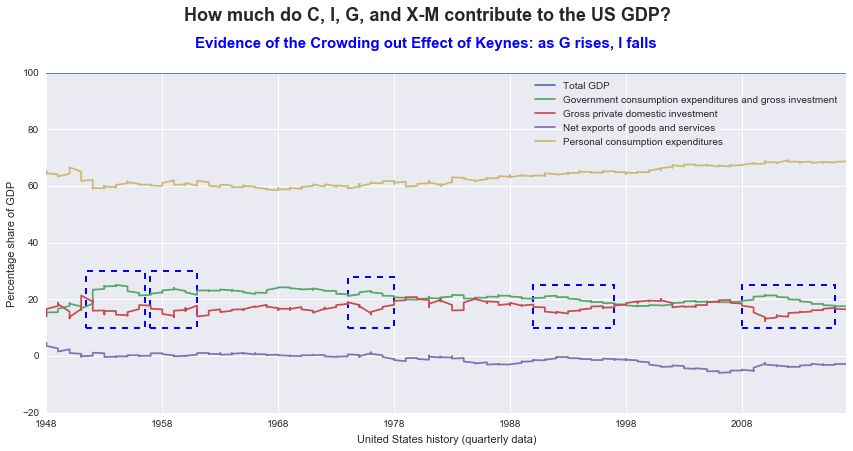

In [4]:
timefig = plt.figure()
timefig.set_size_inches(12, 6)
plt.suptitle('How much do C, I, G, and X-M contribute to the US GDP?', y=1.04,
          fontsize=18, fontweight='bold')
plt.title('Evidence of the Crowding out Effect of Keynes: as G rises, I falls', x=0.475, y=1.06,
          fontsize=15, fontweight='bold', color='b')
plt.xlabel('United States history (quarterly data)')
plt.ylabel('Percentage share of GDP')
add_series(df, 'date', 'Gross domestic product', 'Total GDP')
add_series(df, 'date', 'Government consumption expenditures and gross investment')
add_series(df, 'date', 'Gross private domestic investment')
add_series(df, 'date', 'Net exports of goods and services')
add_series(df, 'date', 'Personal consumption expenditures')
plt.legend()


box_date('June 1951', 'July 1956', 10, 20, 'blue')
box_date('Dec 1956', '1961', 10, 20, 'blue')
box_date('1974', '1978', 10, 18, 'blue')
box_date('1990', '1997', 10, 15, 'blue')
box_date('2008', '2016', 10, 15, 'blue')


plt.tight_layout()
plt.show()

### Results of data analysis on GDP over time
In my graph _"How much do C, I, G, and X-M contribute to the US GDP?"_, the yellow line indicates the percentage of GDP made up by personal consumption. This analysis shows that **personal consumption (C) does indeed dominate GDP** in the United States, and has been an increasing proportion of the GDP over time, now standing at roughly 70% of GDP.

Secondly, since about 1976, the United States has been in a trade deficit, having **negative net exports**.

Most interestingly, **bubble formations in the quarterly series for government expenditures (G, green), and private investment (I, red), seem to indicate the Crowding out Effect of Keynes**. I have boxed several clear bubbles in blue. In the following date ranges, **investment fell while government expenditure rose**, and investment rose while government expenditure fell as a percentage of GDP:
* Mid 1951 to Mid 1956
* Late 1956 to 1961
* 1974 to 1978
* 1990 to 1997
* 2008 to 2016

## A closer look at the Crowding out effect of Keynes: As G increases, I, C and X-M decrease

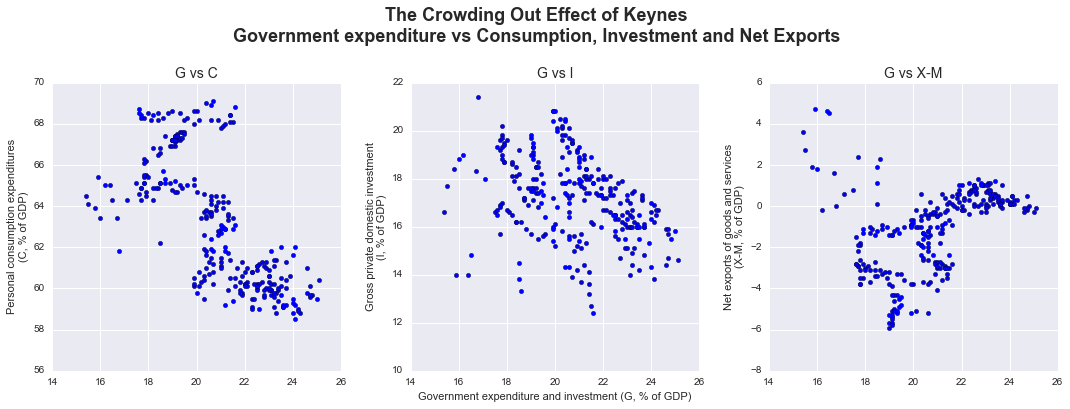

In [7]:
fig = plt.figure()
fig.set_size_inches(15,5)
plt.suptitle('The Crowding Out Effect of Keynes\nGovernment expenditure vs Consumption, Investment and Net Exports',
             y=1.13, fontsize=18, fontweight='bold')
# plt.gca().set_title('', fontsize=16, fontweight='bold')

ax1 = fig.add_subplot(131)
ax1.set_ylabel('Personal consumption expenditures\n(C, % of GDP)')
ax1.set_title('G vs C', fontsize=14)
plt.scatter(df['Government consumption expenditures and gross investment'], df['Personal consumption expenditures'])

ax2 = fig.add_subplot(132)
ax2.set_xlabel('Government expenditure and investment (G, % of GDP)')
ax2.set_ylabel('Gross private domestic investment\n(I, % of GDP)')
ax2.set_title('G vs I', fontsize=14)
plt.scatter(df['Government consumption expenditures and gross investment'], df['Gross private domestic investment'])

ax3 = fig.add_subplot(133)
ax3.set_ylabel('Net exports of goods and services\n(X-M, % of GDP)')
ax3.set_title('G vs X-M', fontsize=14)
plt.scatter(df['Government consumption expenditures and gross investment'], df['Net exports of goods and services'])


fig.tight_layout()
fig.show()

In my chart, _"The Crowding Out Effect of Keynes"_, **government expenditures and private investment (G and I) are inversely related**. Similarly, **government expenditures and personal consumtion (G and C) are inversely related**. Finally, the graph of **government expenditures and net exports (G and X-M) has a downward trend**, although this relationship is not as clearmly inverse.

## But... let's look at the pairing of other variables
**Every pair of variables seems to be inversely related!** In other words, as any variable (C, I, G, or X-M) increases, every other variable trends downward. For example, as consumption increases, net exports seem to decline _(chart on row 3, column 4)_. In this particular case (C and X-M), perhaps as the exchange rate for the USD rises, or the USD appreciates, consumption increases as Americans have increased buying power in the international current market. However, US exports fall as foreigners cannot afford to buy our goods.

While the Crowding out Effect of Keynes may indeed be at play, these empirical inverse relationships may simply be a side effect of the topology of our data. We track the percentage makeup of the United States GDP due to consumption, government expenditure, private investment and net exports. Of course, if the percentage of one variable increases for any reason, some or all of the other variables must simultaneously decrease as the sum is fixed at 100%.

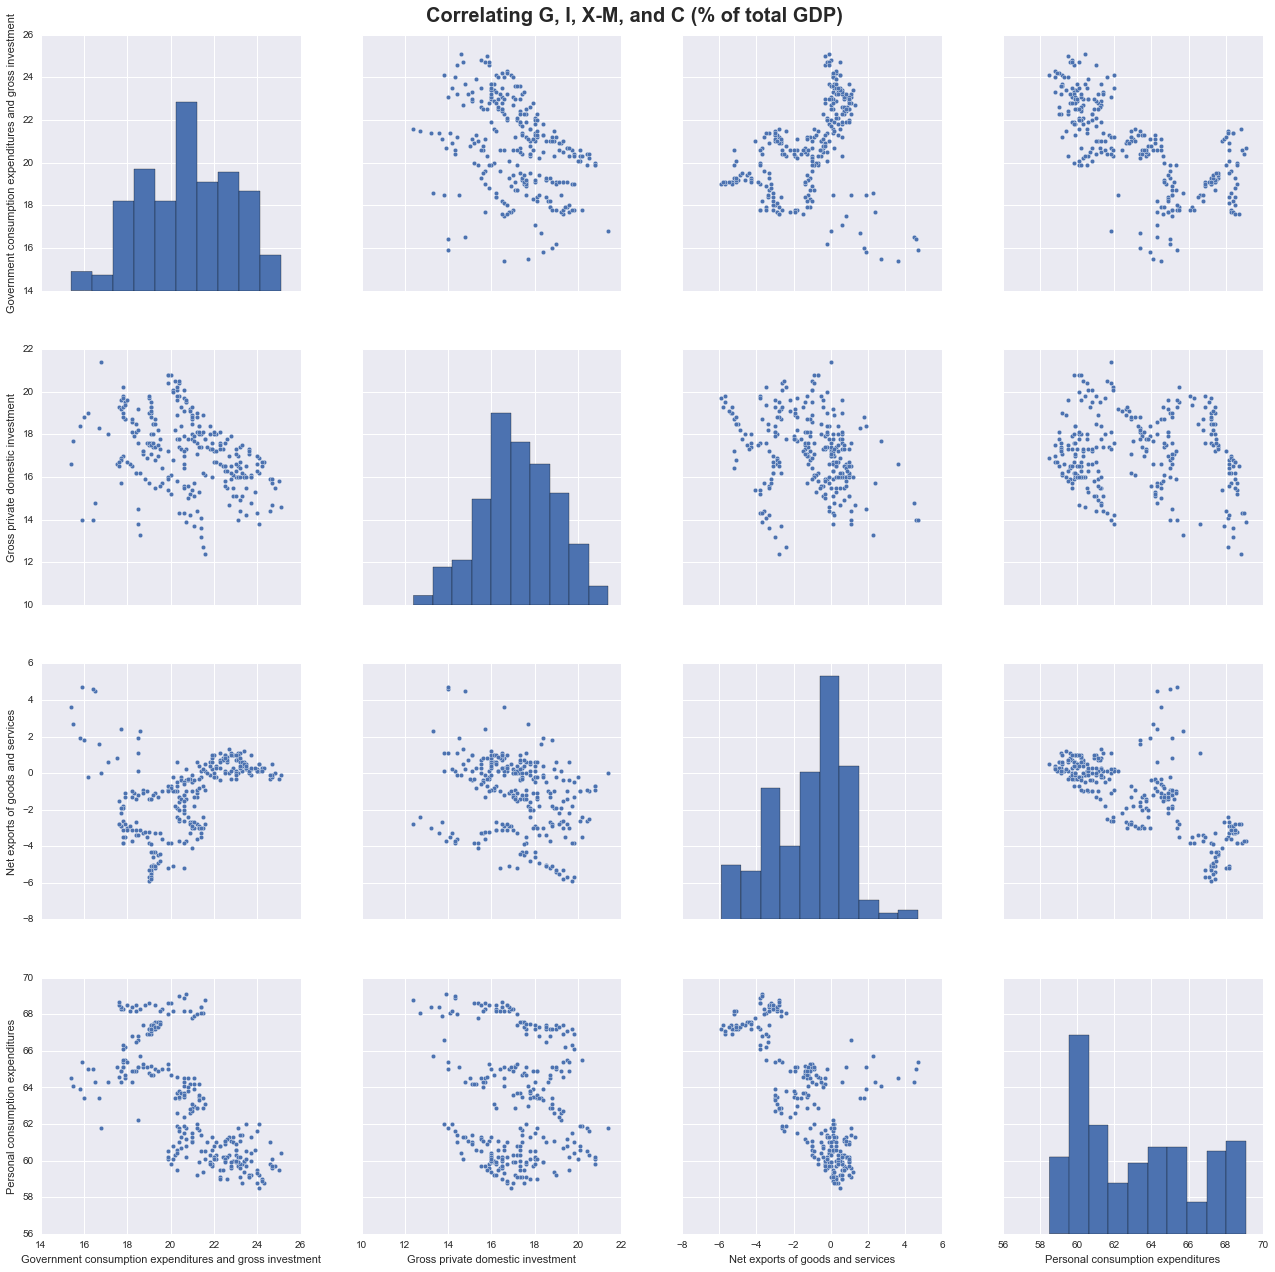

In [8]:
sns.pairplot(tidydf, vars=['Government consumption expenditures and gross investment', 'Gross private domestic investment',
                       'Net exports of goods and services', 'Personal consumption expenditures'],
                size=4.5)
sns.plt.gcf().suptitle('Correlating G, I, X-M, and C (% of total GDP)', fontsize=20, fontweight='bold')